In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hiringdf = pd.read_csv("aggregate_job_postings_US.csv")
hiringdf.head()

,date,jobcountry,pct_chng_feb_1,variable
0,2020-02-01,US,0.00,total postings
1,2020-02-01,US,0.00,new postings
2,2020-02-02,US,0.01,total postings
3,2020-02-02,US,0.84,new postings
4,2020-02-03,US,0.20,total postings


In [3]:
hiringdf['date'] = pd.to_datetime(hiringdf['date'])
hiringdf = hiringdf[hiringdf['variable'] == 'total postings']
hiringdf = hiringdf[['date', 'pct_chng_feb_1']]

In [4]:
hiringdf.tail()

,date,pct_chng_feb_1
802,2021-03-08,7.38
804,2021-03-09,7.78
806,2021-03-10,8.07
808,2021-03-11,8.37
810,2021-03-12,8.63


In [5]:
import datetime as dt

In [6]:
tempd1 = dt.datetime(2021, 2, 15)
tempd2 = dt.datetime(2021, 3, 12)

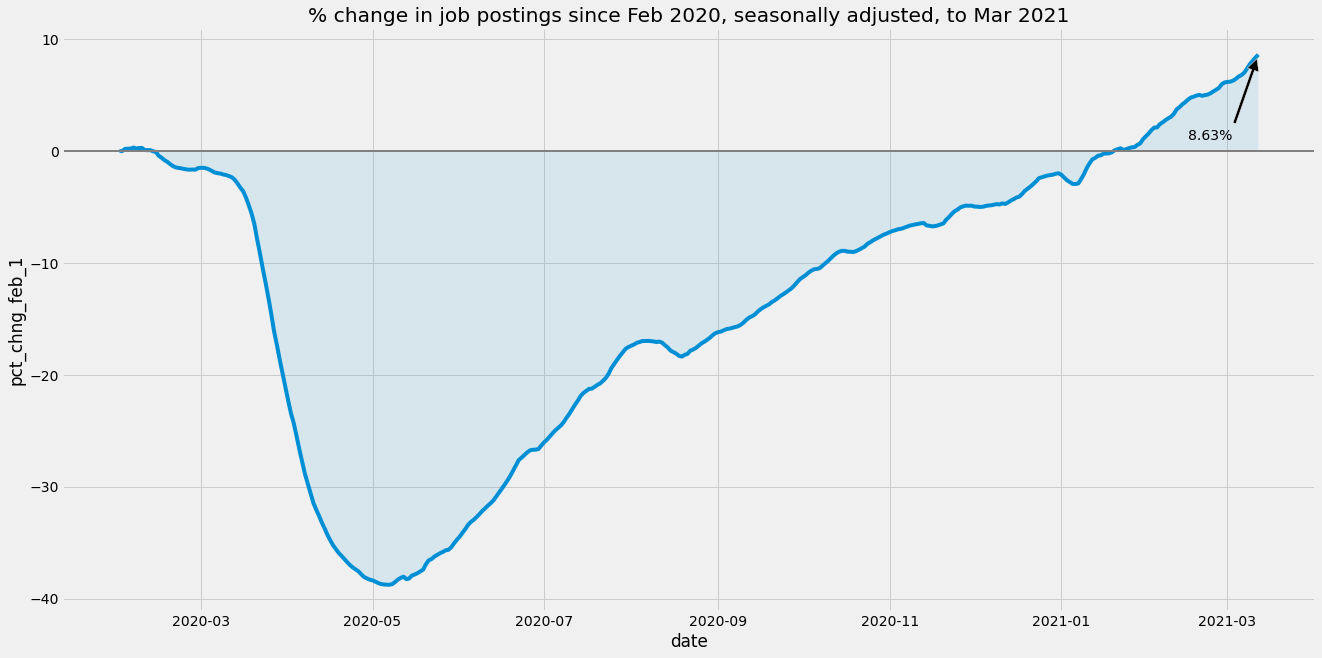

In [7]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='pct_chng_feb_1', data=hiringdf)

plt.title('% change in job postings since Feb 2020, seasonally adjusted, to Mar 2021')
plt.axhline(0, color='0.5', linewidth=2)
plt.fill_between('date','pct_chng_feb_1', 0, alpha=0.1, data=hiringdf)
ax.annotate('8.63%', xy=(tempd2, 8.6), xytext=(tempd1, 1),
            arrowprops=dict(width=3,facecolor='black',shrink=0.05),
            )
#plt.show()
plt.savefig('hiringplot.png')